<a href="https://colab.research.google.com/github/SeungPang11/Fake-News-Detection-with-Maching-Learning-Updated-Jan-24-/blob/main/Exploratory_Data_Analysis_Fake_News_Detection_(Updated_Jan_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis** - **Fake News Detection (Updated Jan 2024)**
* **Objective**: Using FakeNewsNet datasets, improve performance to achieve <br>
more efficient and reliable predictive models for detecting fradulant information. <br>

* **Dataset**: [FakeNewsNet](https://github.com/KaiDMML/FakeNewsNet)<br>
  -Fake and real news from two news platforms, **Gossip Cop** and **Politifact**
<br> -**Attributes** include: id, news_url, title, and tweet_ids

 -Gossip Cop fake news - 5323 rows, 4 columns <br>
 -Gossip Cop real news - 16817 rows, 4 columns

 -Politifact fake news - 432 rows, 4 columns <br>
 -Politifact real news - 624 rows, 4 columns

 -Total fake news - 5755 <br>
 -Total real news - 17441


* **Problem**: imbalanced dataset; the total # real news **three times more** than the total # fake news <br>

*  **Process**: <br>
  -**Exploratory Data Analysis (EDA)** <br>
  -Feature Engineering <br>
  -Text Pre-processing <br>
  -Model Performance BEFORE Imbalanced Data Handling <br>
  -Model Performance AFTER SMOTE <br>
  -Model Performance AFTER Oversampling + Undersampling <br>

* **Models**: Naive Bayes, Logistic Regression, XGBoost, SVM

In [ ]:
# Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Loading GossipCop and Politifact Dataframes

In [ ]:
#GossipCop Fake News and Real News
gossip_fn = pd.read_csv("/content/drive/MyDrive/gossipcop_fake.csv")
gossip_tn = pd.read_csv("/content/drive/MyDrive/gossipcop_real.csv")

In [ ]:
gossip_fn.head(5)

,id,news_url,title,tweet_ids
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...


In [ ]:
gossip_tn.head(5)

,id,news_url,title,tweet_ids
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...


In [ ]:
gossip_fn.shape

(5323, 4)

In [ ]:
gossip_tn.shape

(16817, 4)

In [ ]:
#Load Politifact Fake and Real News
politi_fn = pd.read_csv("/content/drive/MyDrive/politifact_fake.csv")
politi_tn = pd.read_csv("/content/drive/MyDrive/politifact_real.csv")

In [ ]:
politi_fn.head(5)

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


In [ ]:
politi_tn.head(5)

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...


In [ ]:
politi_fn.shape

(432, 4)

In [ ]:
politi_tn.shape

(624, 4)

## Exploratory Data Analysis (EDA)

In [ ]:
#Check for Missing Values
gossip_fn.isnull().values.any()
gossip_fn.isnull().sum()

id             0
news_url     256
title          0
tweet_ids    188
dtype: int64

In [ ]:
gossip_tn.isnull().sum()

id              0
news_url       13
title           0
tweet_ids    1058
dtype: int64

In [ ]:
politi_fn.isnull().sum()

id            0
news_url      4
title         0
tweet_ids    40
dtype: int64

In [ ]:
politi_tn.isnull().sum()

id             0
news_url      57
title          0
tweet_ids    215
dtype: int64

In [ ]:
#Check for Duplicate Values
gossip_fn.duplicated().sum()
gossip_tn.duplicated().sum()

0

In [ ]:
politi_fn.duplicated().sum()
politi_tn.duplicated().sum()

0

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Text cleaning - to lowercase, remove URLs, special characters, punctuations, stopwords, and emojis

stop_words = stopwords.words()

def cleaning(text):
    # converting to lowercase
    text = text.lower()

    # removing URL links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # removing special characters, punctuations
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # removing the emojies https://www.kaggle.com/alankritamishra/covid-19-tweet-sentiment-analysis#Sentiment-analysis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text

dt = gossip_tn['title'].apply(cleaning)

In [ ]:
#GossipCop Real News Text Pattern Analysis

from collections import Counter
GC_RN = Counter(" ".join(dt).split()).most_common(10)
GC_RN_Result = pd.DataFrame(GC_RN, columns=['Word', 'Frequency'])
print(GC_RN_Result)

         Word  Frequency
0        2018        697
1      season        620
2  kardashian        600
3      awards        597
4        star        501
5     wedding        492
6        baby        462
7     reveals        413
8      prince        388
9       watch        376


In [ ]:
# Color Gradient
# Reference: https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b

def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

## Word Frequency of GossipCop and Politifact News Tweets

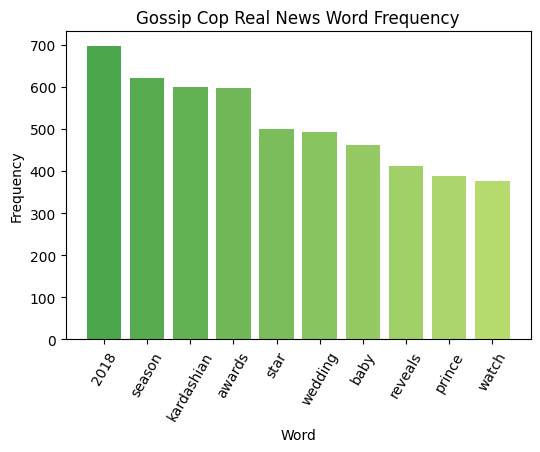

In [ ]:
# Visualization GossipCop Real News - Most Common Words

color1 = "#008000"
color2 = "#9ACD32"

plt.figure(figsize=(6,4))
X = GC_RN_Result['Word']
y = GC_RN_Result['Frequency']
plt.bar(X, y, linewidth=2.0, color = get_color_gradient(color1, color2, len(GC_RN_Result)), alpha=0.7)

plt.title("Gossip Cop Real News Word Frequency")
plt.xlabel("Word")
plt.xticks(rotation=60)
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Gossip Cop Fake News Analysis
GC_FN_Clean = gossip_fn['title'].apply(cleaning)
GC_FN = Counter(" ".join(GC_FN_Clean).split()).most_common(10)
GC_FN_Result = pd.DataFrame(GC_FN, columns=['Word', 'Frequency'])

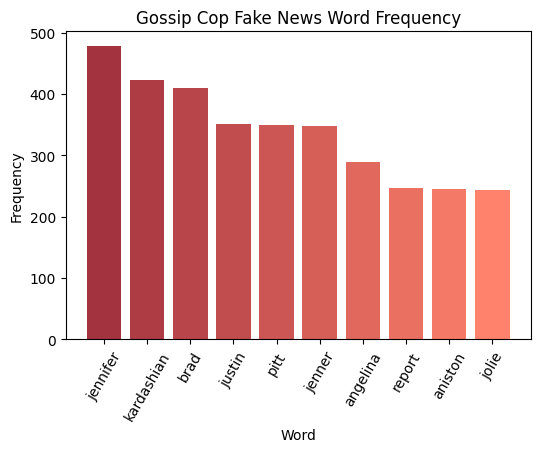

In [ ]:
#Gossip Cop Fake News - Most Common Words
color1 = "#8C000F"
color2 = "#FF6347"

plt.figure(figsize=(6,4))
X = GC_FN_Result['Word']
y = GC_FN_Result['Frequency']
plt.bar(X, y, linewidth=2.0, color = get_color_gradient(color1, color2, len(GC_FN_Result)), alpha=0.8)

plt.title("Gossip Cop Fake News Word Frequency")
plt.xlabel("Word")
plt.xticks(rotation=60)
plt.ylabel("Frequency")
plt.show()

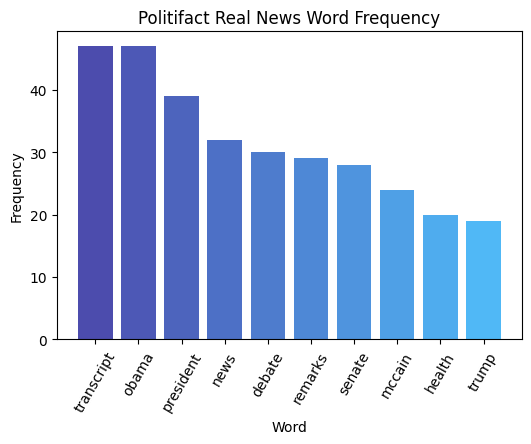

In [ ]:
#Politifact Real News Analysis - Most Common Words
PF_RN_Clean = politi_tn['title'].apply(cleaning)
PF_RN = Counter(" ".join(PF_RN_Clean).split()).most_common(10)
PF_RN_Result = pd.DataFrame(PF_RN, columns=['Word', 'Frequency'])

color1 = "#00008B"
color2 = "#069AF3"

plt.figure(figsize=(6,4))
X = PF_RN_Result['Word']
y = PF_RN_Result['Frequency']
plt.bar(X, y, linewidth=2.0, color = get_color_gradient(color1, color2, len(PF_RN_Result)), alpha=0.7)

plt.title("Politifact Real News Word Frequency")
plt.xlabel("Word")
plt.xticks(rotation=60)
plt.ylabel("Frequency")
plt.show()

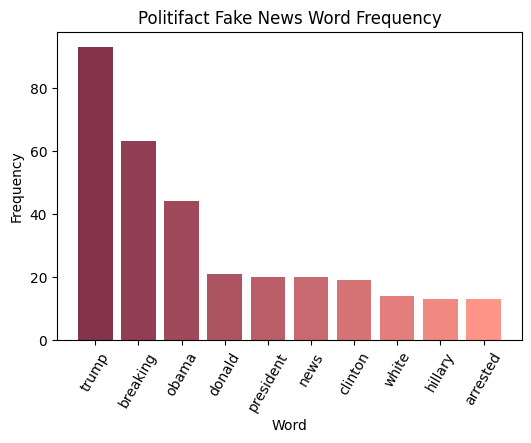

In [ ]:
#Politifact Fake News Analysis - Most Common Words
PF_FN_Clean = politi_fn['title'].apply(cleaning)
PF_FN = Counter(" ".join(PF_FN_Clean).split()).most_common(10)
PF_FN_Result = pd.DataFrame(PF_FN, columns=['Word', 'Frequency'])

color1 = "#650021"
color2 = "#FF796C"

plt.figure(figsize=(6,4))
X = PF_FN_Result['Word']
y = PF_FN_Result['Frequency']
plt.bar(X, y, linewidth=2.0, color = get_color_gradient(color1, color2, len(PF_FN_Result)), alpha=0.8)

plt.title("Politifact Fake News Word Frequency")
plt.xlabel("Word")
plt.xticks(rotation=60)
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Combine GossipCop and Politifact FAKE news
# id, news_url, title, tweet_ids
fakenews = np.concatenate((politi_fn, gossip_fn))
fakenews.shape

(5755, 4)

In [ ]:
#Combine GossipCop and Politifact REAL news
realnews = np.concatenate((politi_tn, gossip_tn))
realnews.shape

(17441, 4)

In [ ]:
# Add Flag - 1 indicate FAKE news
#fakenews.shape (5755, 2)
ones = np.ones(fakenews.shape[0])
fakenews = np.column_stack((fakenews, ones))
fakenews = pd.DataFrame(fakenews, columns = ['id','news_url','title','tweet','flag'])

In [ ]:
fakenews.head(5)

,id,news_url,title,tweet,flag
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...,1.0
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...,1.0
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...,1.0
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...,1.0
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...,1.0


In [ ]:
# Add Flag - 0 indicate REAL news
columns = ['id','news_url','title','tweet','flag']
zeros = np.zeros(realnews.shape[0])
realnews = np.column_stack((realnews, zeros))
realnews = pd.DataFrame(realnews, columns = columns)

In [ ]:
realnews.head(5)

,id,news_url,title,tweet,flag
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...,0.0
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...,0.0
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN,0.0
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN,0.0
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...,0.0


In [ ]:
fakenews = fakenews.fillna(" ")
realnews = realnews.fillna(" ")

In [ ]:
fakenews.isnull().sum()

id          0
news_url    0
title       0
tweet       0
flag        0
dtype: int64

In [ ]:
realnews.isnull().sum()

id          0
news_url    0
title       0
tweet       0
flag        0
dtype: int64

In [ ]:
#Check Shape
fakenews.shape

(5755, 5)

In [ ]:
realnews.shape

(17441, 5)

In [ ]:
# Use for later - Undersampling
#split real news 3:2 (17441 rows total -> 11510 (2/3))
undersample_realnews = realnews.iloc[:11510,:]

In [ ]:
# Combine fake and real news datasets -> allnews
allnews = np.concatenate((fakenews, realnews))

In [ ]:
allnews.shape

(23196, 5)

In [ ]:
# Assign columns
allnews = pd.DataFrame(allnews, columns = columns)

In [ ]:
# Shuffle data
from sklearn.utils import shuffle
allnews = shuffle(allnews)

In [ ]:
allnews.head(5)

,id,news_url,title,tweet,flag
12410,gossipcop-948016,http://www.wopular.com/jennifer-lawrences-slip...,Jennifer Lawrence's Slip Dress Is Made For Laz...,1012671164215328779\t1012671624594669568\t1012...,0.0
6906,gossipcop-850454,https://www.tmz.com/category/real-housewives-o...,Real Housewives of New York,862668514586316802\t862668520588312576\t862668...,0.0
9299,gossipcop-910746,https://www.refinery29.com/en-us/2018/01/18960...,Priyanka Chopra Cryptically Answers If She Is ...,958823208240762882\t958823729307398144\t958824...,0.0
20713,gossipcop-917126,https://secondnexus.com/entertainment/scandal-...,"Tonight, How to Get Away with Scandal – 3/1/2018",968973104948146176\t968973248548421632\t968973...,0.0
17693,gossipcop-875458,https://variety.com/2018/tv/news/dancing-with-...,‘Dancing With the Stars’ Season 26 Cast Revealed,900711433415127041\t900713891604426753,0.0


In [ ]:
allnews.dtypes

id          object
news_url    object
title       object
tweet       object
flag        object
dtype: object

### Word Count Distribution

In [ ]:
#The average count of words of tweet title
#On average, 11 words
allnews['word_count'] = allnews['title'].str.split().apply(len)
allnews['word_count'].mean()

11.161191584755992

In [ ]:
#Word count min - 1, max - 53
allnews['word_count'].min()
allnews['word_count'].max()

53

In [ ]:
len(allnews['word_count'])

23196

In [ ]:
pd.set_option('display.float_format', '{:,.1f}'.format)
allnews.groupby('flag')['word_count'].describe().T

flag,0.0,1.0
count,"17,441.0","5,755.0"
mean,11.2,11.1
std,4.0,4.0
min,1.0,1.0
25%,9.0,9.0
50%,11.0,11.0
75%,14.0,14.0
max,53.0,38.0


<ipython-input-50-a7ce74cb8a71>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdPu')


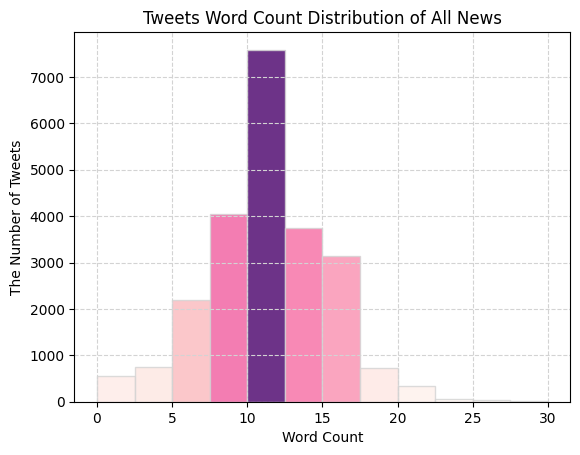

In [ ]:
#Histogram shows the number of words in tweet
#Most tweets have word count that fall between 7-17
#Reference: https://stackoverflow.com/questions/23061657/plot-histogram-with-colors-taken-from-colormap

cm = plt.cm.get_cmap('RdPu')
#Plot histogram
n, bins, patches = plt.hist(allnews['word_count'], alpha=0.8, range=[0, 30], bins=12, edgecolor="lightgrey", color='purple')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = (n-n.min())/(n.max()-n.min())
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title("Tweets Word Count Distribution of All News")
plt.xlabel("Word Count")
plt.ylabel("The Number of Tweets")
plt.grid(color='lightgrey', linestyle='--')
plt.show()

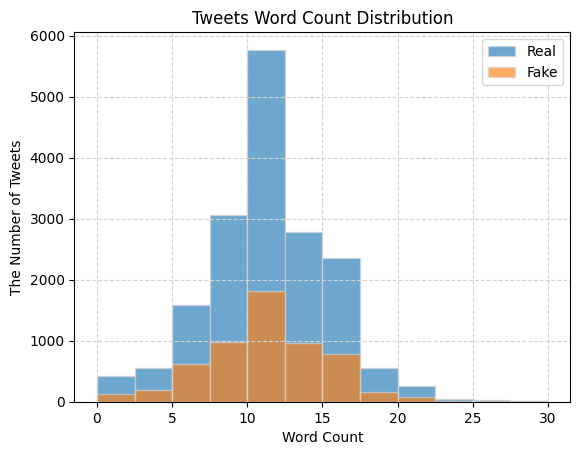

In [ ]:
# Word Count Distribution by News Type
allnews.groupby('flag')['word_count'].hist(bins=12, range=[0, 30], alpha=0.65,label=['Real','Fake'], edgecolor="lightgrey")

plt.title("Tweets Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("The Number of Tweets")
plt.legend(labels=["Real", "Fake"])
plt.grid(color='lightgrey', linestyle='--')
plt.show()

## Feature Engineering
1) **Tweet Count** <br>
* "**tweet count**" feature shows the number of times a news article has been tweeted/ retweeted <br><br>

2) **Sentiment Analysis** <br>

* Analyze the emotional tone of the news <br>

* Create features with the following information - polarity, sensitivity, positivity, negativity, neutrality <br><br>

3) **TD-IDF** (Term Frequency-Inverse Document Frequency) <br>
* Transform texts into numeric representation to make data usable for ML models <br>
* **TF (Term Frequency)**:
(# times term t appears in a document) / (Total # of terms in the document) <br>
* **IDF (Inverse Document Frequency)**:
Log_10 (Total # of documents) / (# of documents with term t in it)

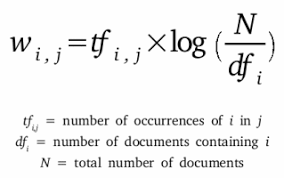



### 1) Tweet Count - # of times a news article has been tweeted/ retweeted.

In [ ]:
#1) "tweet count" column
allnews["tweet count"] = allnews["tweet"].str.split('\t').str.len()

In [ ]:
allnews.head(5)

,id,news_url,title,tweet,flag,word_count,tweet count
12410,gossipcop-948016,http://www.wopular.com/jennifer-lawrences-slip...,Jennifer Lawrence's Slip Dress Is Made For Laz...,1012671164215328779\t1012671624594669568\t1012...,0.0,13,31
6906,gossipcop-850454,https://www.tmz.com/category/real-housewives-o...,Real Housewives of New York,862668514586316802\t862668520588312576\t862668...,0.0,5,42
9299,gossipcop-910746,https://www.refinery29.com/en-us/2018/01/18960...,Priyanka Chopra Cryptically Answers If She Is ...,958823208240762882\t958823729307398144\t958824...,0.0,12,61
20713,gossipcop-917126,https://secondnexus.com/entertainment/scandal-...,"Tonight, How to Get Away with Scandal – 3/1/2018",968973104948146176\t968973248548421632\t968973...,0.0,9,23
17693,gossipcop-875458,https://variety.com/2018/tv/news/dancing-with-...,‘Dancing With the Stars’ Season 26 Cast Revealed,900711433415127041\t900713891604426753,0.0,8,2


In [ ]:
allnews['title'][0]

'BREAKING: First NFL Team Declares Bankruptcy Over Kneeling Thugs'

In [ ]:
allnews['tweet count'][0]

163

In [ ]:
# news that doesn't have retweets have a count of 1
allnews.loc[allnews['tweet'] == " "]

,id,news_url,title,tweet,flag,word_count,tweet count
6017,politifact1825,http://abcnews.go.com/ThisWeek/week-transcript...,'This Week' Transcript: Kaine and Steele,,0.0,6,1
7514,gossipcop-930234,https://www.vogue.com.au/culture/red-carpet/th...,Met Gala 2018: best dressed on the red carpet,,0.0,9,1
16184,gossipcop-865583,https://www.dailymail.co.uk/tvshowbiz/article-...,Kesha discusses moment Jerry Seinfeld rejected...,,0.0,8,1
6050,politifact3320,https://web.archive.org/web/20100405072544/htt...,United States Senator Jim DeMint,,0.0,5,1
6899,gossipcop-889790,https://www.zerchoo.com/entertainment/radio-di...,Radio Disney Star Skylar Stecker Reveals a Gro...,,0.0,12,1
...,...,...,...,...,...,...,...
11943,gossipcop-849640,https://www.usmagazine.com/entertainment/news/...,Kim Kardashian Opens Up About Her Eight-Hour T...,,0.0,11,1
6036,politifact3539,http://stabenow.senate.gov/?p=press_release&id...,U.S. Senator Debbie Stabenow of Michigan,,0.0,6,1
6281,politifact317,,Table B46 Employees on nonagricultural payroll...,,0.0,10,1
21675,gossipcop-888830,https://www.tennessean.com/story/news/2018/09/...,Is Maroon 5 playing the Super Bowl halftime sh...,,0.0,13,1


### Retweets Count Distribution by News Type <br>
**75%** percentile of the number of **real news** retweets fall below 66, <br>
while the number of **fake news** retweets fall below 51. <br>


<ipython-input-57-9b0eec1a158b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  pp.set_xticklabels(['0','1','10', '100','1000','10000'])


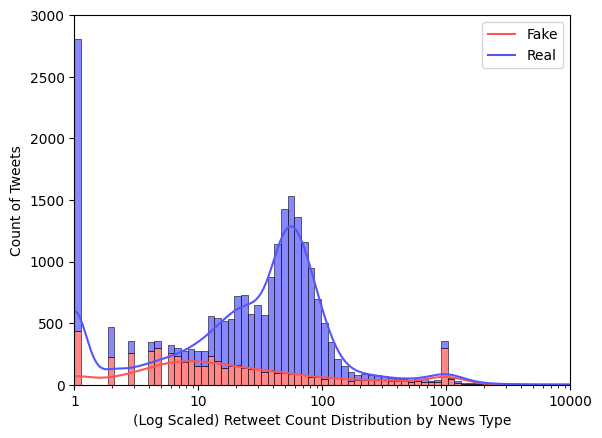

In [ ]:
# Plot retweet distribution by news type (fake, real)
# Log scale since the data is skewed to the right
import seaborn as sns

TweetCount = allnews[["flag", "tweet count"]]
fig, ax = plt.subplots()
pp = sns.histplot(TweetCount, x="tweet count", hue="flag", kde=True, log_scale=True, palette = "seismic", alpha=0.7, multiple="stack")
ax.set_xlim(1, 10000)
ax.set_ylim(0, 3000)

pp.set_xticklabels(['0','1','10', '100','1000','10000'])
plt.legend(labels=["Fake", "Real"])
plt.xlabel("(Log Scaled) Retweet Count Distribution by News Type")
plt.ylabel("Count of Tweets")
plt.show()


In [ ]:
pd.set_option('display.float_format', '{:,.0f}'.format)
print(TweetCount.groupby('flag')['tweet count'].describe().T)

flag       0      1
count 17,441  5,755
mean      75    133
std      467    548
min        1      1
25%       17      5
50%       44     13
75%       66     51
max   27,377 29,060


### 2) Sentiment Analysis <br>
* Analyzing sentiment of news tweets using TextBlob. <br>
* **Polarity** is a float that lies between [-1,1], **-1** indicating **negative** sentiment and **1** indicating **positive** sentiment.<br>
* **Subjectivity** is a float which lies in the range of [0,1]. Subjectivity refers to **personal opinion**, emotion, or judgment.

In [ ]:
# Sentiment Analysis
# Reference: https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair
pd.options.display.float_format = '{:,.2f}'.format
from textblob import TextBlob

In [ ]:
allnews.dtypes

id             object
news_url       object
title          object
tweet          object
flag           object
word_count      int64
tweet count     int64
dtype: object

In [ ]:
# Add Polarity and Sensitivity features

def get_polarity(text):
  polarity = TextBlob(text)
  score = polarity.sentiment[0]
  return score

def get_sensitivity(text):
  sensitivity = TextBlob(text)
  return sensitivity.sentiment[1]


allnews["polarity"] = allnews['title'].apply(lambda x: get_polarity(x))
allnews["sensitivity"] = allnews['title'].apply(lambda x: get_sensitivity(x))

In [ ]:
# Take the features we need
allnews = allnews[["title", "flag", "word_count", "tweet count", "polarity", "sensitivity"]]

In [ ]:
allnews.dtypes

title           object
flag            object
word_count       int64
tweet count      int64
polarity       float64
sensitivity    float64
dtype: object

In [ ]:
allnews.groupby('flag')['polarity'].describe().T

flag,0.00,1.00
count,"17,441.00","5,755.00"
mean,0.09,0.03
std,0.27,0.25
min,-1.00,-1.00
25%,0.00,0.00
50%,0.00,0.00
75%,0.17,0.10
max,1.00,1.00


In [ ]:
allnews.groupby('flag')['sensitivity'].describe().T

flag,0.00,1.00
count,"17,441.00","5,755.00"
mean,0.27,0.24
std,0.32,0.32
min,0.00,0.00
25%,0.00,0.00
50%,0.10,0.00
75%,0.50,0.48
max,1.00,1.00


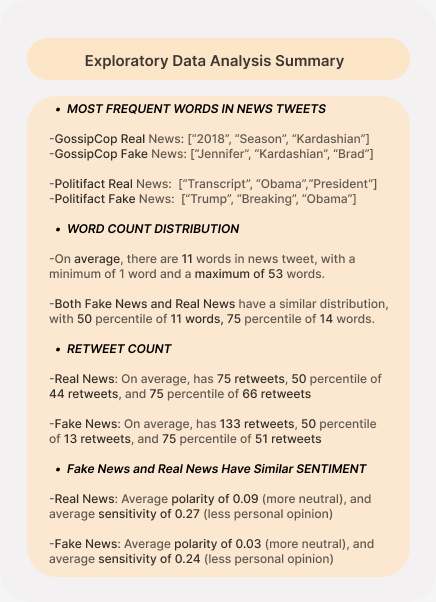